In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
get_ipython().magic('matplotlib inline')

In [4]:
df = pd.read_csv("iris2.data")

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [6]:
scaler.fit(df.drop('TARGET CLASS',axis=1))
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])


# In[316]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [8]:
from sklearn.metrics import classification_report,confusion_matrix

In [9]:
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[12  0  0]
 [ 0 17  0]
 [ 0  1 15]]


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.94      1.00      0.97        17
 Iris-virginica       1.00      0.94      0.97        16

    avg / total       0.98      0.98      0.98        45



In [10]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))



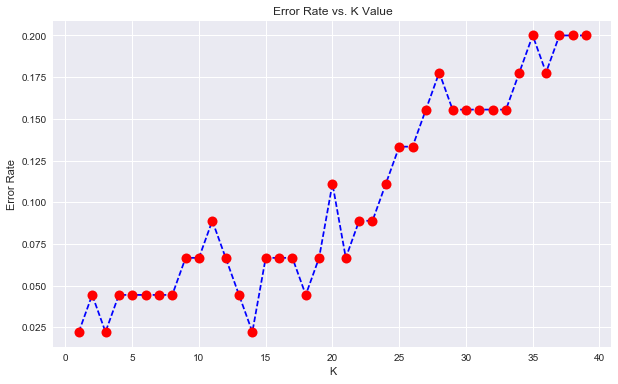

In [11]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [12]:
#main()

In [335]:
def euclideanDistance(instance1, instance2, length):
	distance = 0
	for x in range(length):
		distance += pow((instance1[x] - instance2[x]), 2)
	return math.sqrt(distance)

In [336]:
def getNeighbors(trainingSet, testInstance, k):
	distances = []
	length = len(testInstance)-1
	for x in range(len(trainingSet)):
		dist = euclideanDistance(testInstance, trainingSet[x], length)
		distances.append((trainingSet[x], dist))
	distances.sort(key=operator.itemgetter(1))
	neighbors = []
	for x in range(k):
		neighbors.append(distances[x][0])
	return neighbors
 

In [337]:

def getResponse(neighbors):
	classVotes = {}
	for x in range(len(neighbors)):
		response = neighbors[x][-1]
		if response in classVotes:
			classVotes[response] += 1 #changed 1 to weight
		else:
			classVotes[response] = 1 #changed 1 to weight
	sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
	return sortedVotes[0][0]

In [338]:
def getAccuracy(testSet, predictions):
	correct = 0
	for x in range(len(testSet)):
		if testSet[x][-1] == predictions[x]:
			correct += 1
	return (correct/float(len(testSet))) * 100.0

In [339]:
def main():
    # prepare data
    trainingSet=[]
    testSet=[]
    split = 0.67
    loadDataset('iris.data', split, trainingSet, testSet)
    print ('Train set: ' + repr(len(trainingSet)))
    print ('Test set: ' + repr(len(testSet)))
    # generate predictions
    predictions=[]
    trueResult=[]#added
    k = 2
    for x in range(len(testSet)):
        neighbors = getNeighbors(trainingSet, testSet[x], k)
        result = getResponse(neighbors)
        predictions.append(result)
        trueResult.append(testSet[x][-1])
        #print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))
    accuracy = getAccuracy(testSet, predictions)
    print('Accuracy: ' + repr(accuracy) + '%')
    print(confusion_matrix(trueResult,predictions))
    print('\n')
    print(classification_report(trueResult,predictions))

In [340]:
main()

Train set: 98
Test set: 51
Accuracy: 96.07843137254902%
[[14  0  0]
 [ 0 19  2]
 [ 0  0 16]]


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.90      0.95        21
 Iris-virginica       0.89      1.00      0.94        16

    avg / total       0.97      0.96      0.96        51



In [341]:
error_rate = []

# Will take some time
for i in range(1,40):
    trainingSet = []
    testSet = []
    split = 0.67
    loadDataset('iris.data', split, trainingSet, testSet)
    #print ('Train set: ' + repr(len(trainingSet)))
    #print ('Test set: ' + repr(len(testSet)))
    predictions = []
    for j in range (len(testSet)):
        neighbors = getNeighbors(trainingSet, testSet[j], i)
        result = getResponse(neighbors)
        predictions.append(result)
    accuracy = getAccuracy(testSet, predictions)
    error_rate.append(100-accuracy)
    #error_rate.append(np.mean(predictions != y_test))

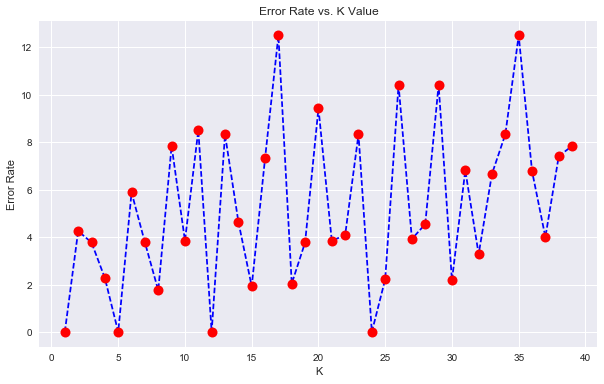

In [342]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [308]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [312]:
df = pd.read_csv("iris2.data")

In [313]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [314]:
scaler.fit(df.drop('TARGET CLASS',axis=1))
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [316]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30)

In [317]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)



In [76]:
from sklearn.metrics import classification_report,confusion_matrix


In [320]:
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[17  1  0]
 [ 0 14  1]
 [ 0  0 12]]


                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.94      0.97        18
Iris-versicolor       0.93      0.93      0.93        15
 Iris-virginica       0.92      1.00      0.96        12

    avg / total       0.96      0.96      0.96        45



In [321]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

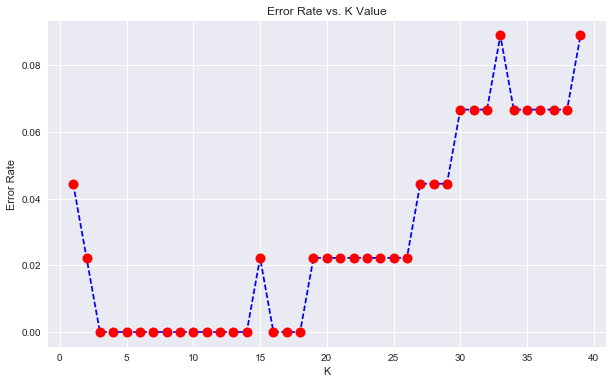

In [322]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [61]:
n_arr = arr_2d[2:4,6:9].copy()

In [56]:
n_arr = 99

In [62]:
n_arr

array([[10, 10, 10],
       [10, 10, 10]])

In [63]:
n_arr[:] = 99

In [64]:
n_arr

array([[99, 99, 99],
       [99, 99, 99]])

In [65]:
arr_2d

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 10, 10, 10, 29],
       [30, 31, 32, 33, 34, 35, 10, 10, 10, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49]])

In [66]:
import numpy as np

In [67]:
arr = np.arange(0,11)

In [68]:
arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [69]:
arr + arr

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20])

In [70]:
arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [71]:
arr*arr

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100])

In [72]:
arr - 2

array([-2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8])

In [73]:
1 + arr

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [74]:
1/0

ZeroDivisionError: division by zero

In [75]:
arr/arr

/Users/Manny/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([ nan,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.])

In [76]:
0/0

ZeroDivisionError: division by zero

In [77]:
1/0

ZeroDivisionError: division by zero

In [78]:
1/arr

/Users/Manny/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


array([        inf,  1.        ,  0.5       ,  0.33333333,  0.25      ,
        0.2       ,  0.16666667,  0.14285714,  0.125     ,  0.11111111,
        0.1       ])

In [79]:
arr ** 2

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100])

In [80]:
np.sqrt(arr)

array([ 0.        ,  1.        ,  1.41421356,  1.73205081,  2.        ,
        2.23606798,  2.44948974,  2.64575131,  2.82842712,  3.        ,
        3.16227766])

In [81]:
np.max(arr)

10

In [82]:
np.sin(arr)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849,
       -0.54402111])

In [83]:
np.log(arr)

/Users/Manny/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


array([       -inf,  0.        ,  0.69314718,  1.09861229,  1.38629436,
        1.60943791,  1.79175947,  1.94591015,  2.07944154,  2.19722458,
        2.30258509])